In [2]:
import os
import pandas as pd
import numpy as np

from skimage.io import imread, imsave
from skimage.filters import threshold_otsu
from skimage.transform import rescale

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

import matplotlib.pyplot as plt

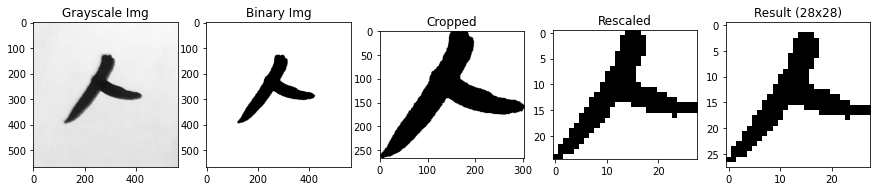

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

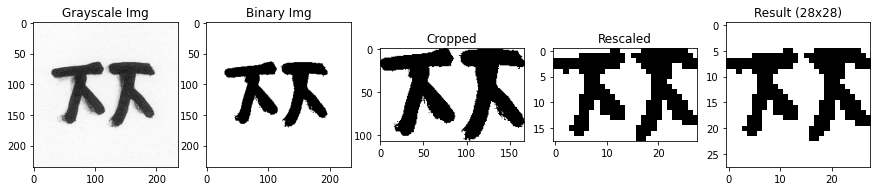

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
  0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1

In [10]:
images = ['dataset/s/S (1).jpg', 'dataset/jj/JJ (2).jpg']

for img_path in images:
    image = imread(img_path, as_gray=True)
    thresh = threshold_otsu(image)
    binary = image <= thresh
    #print(binary)

    rows = np.where(np.any(binary==True, axis=1))
    cols = np.where(np.any(binary==True, axis=0))
    cropped = binary[min(rows[0]):max(rows[0]+1), min(cols[0]):max(cols[0])+1]

    if cropped.shape[0] > cropped.shape[1]:
        rescaled = rescale(cropped, 28/cropped.shape[0])
        kurang = 28-rescaled.shape[1]
        zeros_l = np.zeros((28,int(np.ceil(kurang/2))))
        zeros_r = np.zeros((28,int(np.floor(kurang/2))))
        new_img = np.hstack((rescaled, zeros_r))
        new_img = np.hstack((zeros_l, new_img))
    else:
        rescaled = rescale(cropped, 28/cropped.shape[1])
        
        kurang = 28-rescaled.shape[0]
        zeros_l = np.zeros((int(np.ceil(kurang/2)),28))
        zeros_r = np.zeros((int(np.floor(kurang/2)),28))
        new_img = np.vstack((rescaled, zeros_r))
        new_img = np.vstack((zeros_l, new_img))

    fig, ax = plt.subplots(ncols=5, figsize=(15 ,5))
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Grayscale Img')

    ax[1].imshow(binary, cmap=plt.cm.gray_r)
    ax[1].set_title('Binary Img')

    ax[2].imshow(cropped, cmap=plt.cm.gray_r)
    ax[2].set_title('Cropped')

    ax[3].imshow(rescaled, cmap=plt.cm.gray_r)
    ax[3].set_title('Rescaled')

    ax[4].imshow(new_img, cmap=plt.cm.gray_r)
    ax[4].set_title('Result (28x28)')
    plt.show()
    
    print(new_img)

In [4]:
def extract_feature(path, dim=28):
    image = imread(path, as_gray=True)

    thresh = threshold_otsu(image)
    binary = image <= thresh

    rows = np.where(np.any(binary==True, axis=1))
    cols = np.where(np.any(binary==True, axis=0))
    cropped = binary[min(rows[0]):max(rows[0]+1), min(cols[0]):max(cols[0])+1]

    if cropped.shape[0] > cropped.shape[1]:
        rescaled = rescale(cropped, dim/cropped.shape[0])
        kurang = dim-rescaled.shape[1]
        zeros_l = np.zeros((dim,int(np.ceil(kurang/2))))
        zeros_r = np.zeros((dim,int(np.floor(kurang/2))))
        new_img = np.hstack((rescaled, zeros_r))
        new_img = np.hstack((zeros_l, new_img))
    else:
        rescaled = rescale(cropped, dim/cropped.shape[1])
        kurang = dim-rescaled.shape[0]
        zeros_l = np.zeros((int(np.ceil(kurang/2)),dim))
        zeros_r = np.zeros((int(np.floor(kurang/2)),dim))
        new_img = np.vstack((rescaled, zeros_r))
        new_img = np.vstack((zeros_l, new_img))
    return new_img.astype(np.uint8)

In [5]:
X = []
y = []

dataset_path = 'dataset'
dim = 28

list_dir = os.listdir(dataset_path)
list_dir.sort()
for directory in list_dir:
    char_name = directory
    dir_path = os.path.join(dataset_path, directory)
    list_img_filename = os.listdir(dir_path)
    list_img_filename.sort()
    #print(char_name)
    for i, img_filename in enumerate(list_img_filename):
        img_path = os.path.join(dir_path, img_filename)
        new_img = extract_feature(img_path, dim=dim)
        #print(img_filename)

        
         # new_dir = f'hasil_prepro/{char_name}'
         # if not os.path.exists(new_dir):
         #   os.makedirs(new_dir)
         # imsave(f'{new_dir}/{char_name}_{i}.jpg', new_img*255)
        
        X.append(new_img.reshape(dim*dim))
        y.append(char_name)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34, stratify=y)

# clf = MultinomialNB()
# clf = BernoulliNB()
clf = GaussianNB()

clf.fit(X_train, y_train)
print (len(X_test[1]))
y_pred = clf.predict(X_test)
print(len(y_pred[0]))

print(f'Akurasi: {accuracy_score(y_test, y_pred):.2%}')

784
1
Akurasi: 68.94%


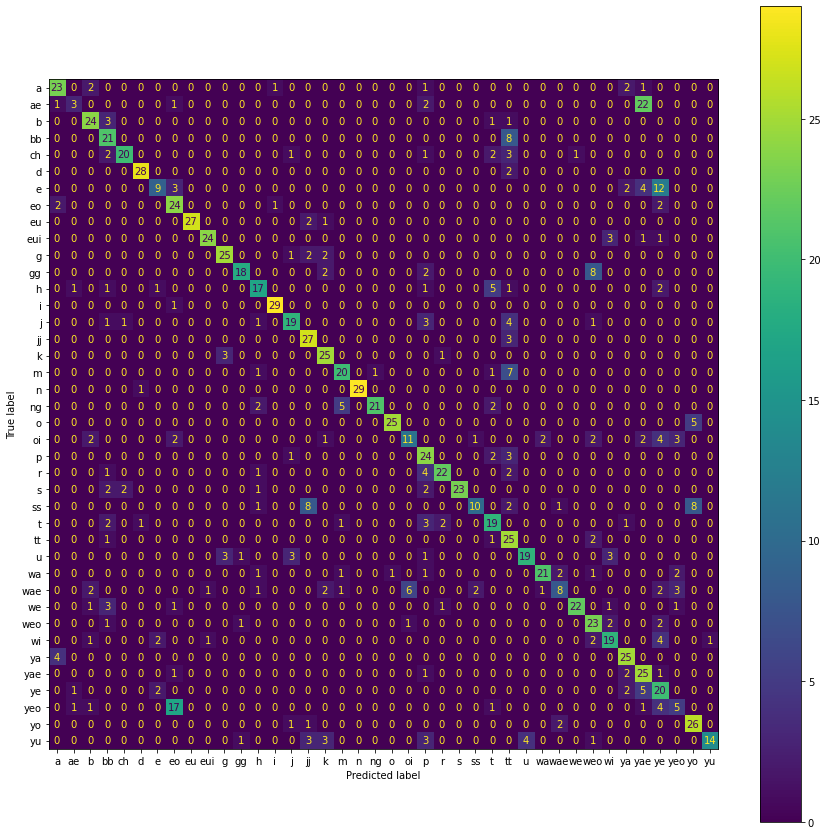

In [7]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.show()

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.77      0.77      0.77        30
          ae       0.50      0.10      0.17        29
           b       0.73      0.83      0.77        29
          bb       0.55      0.72      0.63        29
          ch       0.87      0.67      0.75        30
           d       0.93      0.93      0.93        30
           e       0.64      0.30      0.41        30
          eo       0.48      0.83      0.61        29
          eu       1.00      0.90      0.95        30
         eui       0.92      0.83      0.87        29
           g       0.81      0.83      0.82        30
          gg       0.86      0.60      0.71        30
           h       0.65      0.59      0.62        29
           i       0.94      0.97      0.95        30
           j       0.73      0.63      0.68        30
          jj       0.63      0.90      0.74        30
           k       0.69      0.86      0.77        29
           m       0.71    

In [9]:
import pickle
pickle.dump(clf, open('C:/Users/Lenovo/programskripsi/model_training2.sav', 'wb'))